### Laboratorium 6 - część 2/2

W tej części zajmiesz się wykorzystaniem punktów kluczowych do dwóch popularnych zadań: wyszukiwania obszarów podobnych oraz łączenia obrazów (_image stitching_).

Przeczytaj treść całej instrukcji przed przystąpieniem do działania!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 3

Dane są obrazy `coke` i `table`. Wykorzystaj metodologię parowania punktów kluczowych do znalezienia wystąpienia puszki z Colą na stole. To zadanie jest podzielone na kilka kamieni milowych - czytaj dalej.

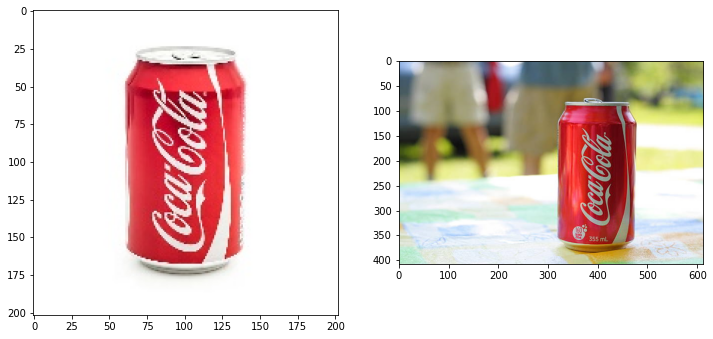

In [2]:
coke = cv2.imread('coke.jpg')
table = cv2.imread('coke-table.jpg')
f, (a1, a2) = plt.subplots(1, 2, figsize=(12,12))
a1.imshow(coke[..., ::-1]);
a2.imshow(table[..., ::-1]);

##### Zadanie 3a

Wykonaj detekcję punktów kluczowych i ich parowanie z użyciem dowolnego matchera. Wykonaj filtrację znalezionych par po dystansie - co obserwujesz, zmieniając próg?

##### Zadanie 3b

Powtórz detekcję z użyciem k-najlepszych wyników (dla niewielkiego k, np. 2 lub 3). Zaproponuj prosty sposób wykrywania sytuacji, w których jeden punkt jest podobnie bliski innym i użyj go do odfiltrowania wyników, tak aby pozostawić te bardziej unikatowe dopasowania. *Czy unikatowe znaczy dobre?*

##### Zadanie 3c

Znajdź transformację geometryczną dla par dopasowanych punktów, tak aby przekształcić `coke` (*train*) do geometrii `table` (query). Zademonstruj poprawność, zestawiając obok siebie przekształconą wersję `coke` oraz oryginalny `table`, bądź nanosząc jedno na drugie. Zidentyfikuj punkty, które znaleziona transformacja przekształca "dobrze", tzn. ich współrzędne po przekształceniu leżą w pobliżu odpowiadających im punktów z drugiego obrazu; nanieś je na obraz.

*Jak na wyniki wpływa wykrycie większej lub mniejszej liczby punktów kluczowych na etapie SIFT? W jakim stopniu wstępna filtracja poprawia rezultaty? Jak działa i jaką rolę w procesie parowania odgrywa RANSAC?*

*\"Na piątkę\"*: znajdź rejon zainteresowania (RoI), tj. prostokąt otaczający zidentyfikowane właśnie punkty, a następnie oblicz błąd średniokwadratowy między obrazami w tym rejonie (albo dowolną miarę podobieństwa). Bonus: użyj [`cv2.convexHull`](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656) do narysowania maski wybierającej tylko piksele znajdujące się wewnątrz wielokąta otaczającego "dobrze" dopasowane punkty, by liczyć miarę podobieństwa jedynie wewnątrz tego obszaru.

#### Zadanie 4

Wykonaj serię zdjęć dowolnej wybranej przez siebie **statycznej** sceny. Może to być zupełnie dowolny widok o dowolnej skali: panorama miasta, swojego pokoju, powierzchni biurka - ważne, by pozyskane obrazy zawierały jakieś punkty charakterystyczne. (Może posiadasz jakieś ciekawe dane z własnego projektu, które możesz tu wykorzystać?)

Wykonaj 4-5 zdjęć, spośród których pierwsze (nazwij je `base`) niech przedstawia \"główny\" widok sceny, a pozostałe (o nazwie `offset_{index}`) niech cechują się coraz większym przesunięciem kamery względem `base`. Proponowane różnice:
* nieznaczne przesunięcie (o połowę-2/3 szerokości klatki)
* większe przesunięcie (o 3/4-4/5 szerokości)
* przesunięcie z rotacją w osi kamery
* (jeśli to możliwe) przybliżenie/oddalenie kamery.

Celem zadania będzie przetestowanie możliwości detekcji i parowania punktów kluczowych w celu łączenia (_stitching_) obrazów. Wykorzystaj algorytmy opracowane do realizacji zadania 3 (zwłaszcza 3c) w celu przekształcania obrazów `offset_x` do geometrii `base`. Upewnij się, że wymiary tworzonych w ten sposób obrazów są wystarczające do zmieszczenia obu składowych. Jeśli rozwiązujesz zadanie 3c w wariancie _\"na piątkę\"_, użyj tej metody oceny również w tym zadaniu.

*Czy każdą parę `offset_i`-`base` udało się połączyć? Jaka jest jakość dopasowania? Jeśli dla którejś pary algorytm zawiódł - dlaczego?*